# Timetable Swiss
## !Do do
* Startpunkt einfügen

## Importing Libraries
Importing libraries. Setting `%matplotlib inline` to plott the graph inside the notebook

In [1]:
%matplotlib inline

import pandas as pd
import geopandas
#from shapely.geometry import Point, Polygon
#import fiona
import datetime
import numpy as np

#Disable Warning
pd.options.mode.chained_assignment = None

## Import Points

In [2]:
# Import Points
#df_points = pd.read_csv('../data_generated/20180521_sampled.csv')
df_points = pd.read_csv('../data_generated/20180521.csv')

In [3]:
#Import Plane list
df_planes = pd.read_csv('../data_generated/swiss_aircrafts.csv')

#Set indexes
df_planes = df_planes.set_index('icao24')

Have a look at the imported data by showing a sample
```
df_points.head()
df_planes.head()
```

## Join points and airplanes

In [4]:
# Join Plane and Swiss
df_joined = df_points.join(df_planes, on='icao24')

In [5]:
# Generate a subset with only Swiss Planes
df_swiss = df_joined[df_joined.status == 'active']

#Convert Departure Time (timestamp) to datetime (ignore warning)
df_swiss['timestamp'] = pd.to_datetime(df_swiss['timestamp'], format='%Y-%m-%d %H:%M:%S')

## Add Hour of Day to dataset

In [6]:
df_swiss['hour'] = df_swiss['timestamp'].dt.hour

## Group and Plot

In [7]:
#Group
df_grouped = df_swiss.groupby(['hour', 'longrange']).agg({'icao24': 'count'}).unstack('longrange')

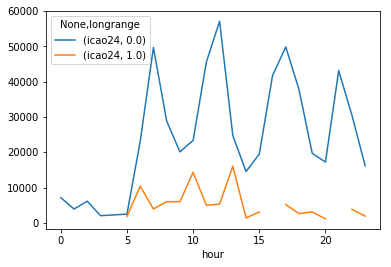

In [8]:
#Plot in one Chart
df_grouped.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x120405588>,
      dtype=object)

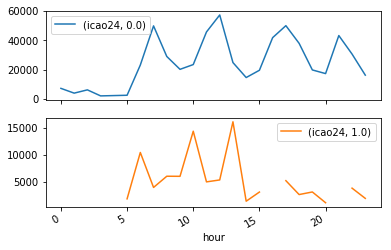

In [13]:
#Plot in two
df_grouped.plot(subplots=True)